/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


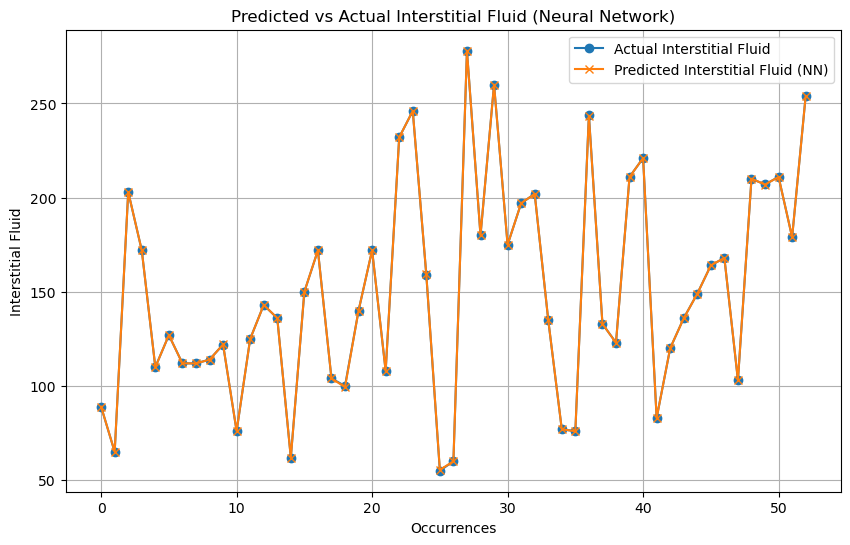

Next predicted interstitial fluid reading: 253.98312541834616


In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Moni.xlsx'
df = pd.read_excel(file_path)

# Prepare the data (include all variables)
X = df[["Acetone ketones ppm", "Blood Pressure Top", "Blood Pressure Bottom", "Pulse", "Heart Rate", "Temperature", "Pulse Oxygen"]]
y = df["Interstital Fluid"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=5000, random_state=42)
nn_model.fit(X_scaled, y)

# Predict the interstitial fluid using the neural network model
df['Predicted Interstitial Fluid (NN)'] = nn_model.predict(X_scaled)

# Predict the next interstitial fluid reading based on the latest data point
next_data_point = scaler.transform([X.iloc[-1].values])
next_prediction = nn_model.predict(next_data_point)[0]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Interstital Fluid'], label='Actual Interstitial Fluid', marker='o')
plt.plot(df.index, df['Predicted Interstitial Fluid (NN)'], label='Predicted Interstitial Fluid (NN)', marker='x')
plt.xlabel('Occurrences')
plt.ylabel('Interstitial Fluid')
plt.title('Predicted vs Actual Interstitial Fluid (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

# Print the next predicted interstitial fluid reading
print(f"Next predicted interstitial fluid reading: {next_prediction}")


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


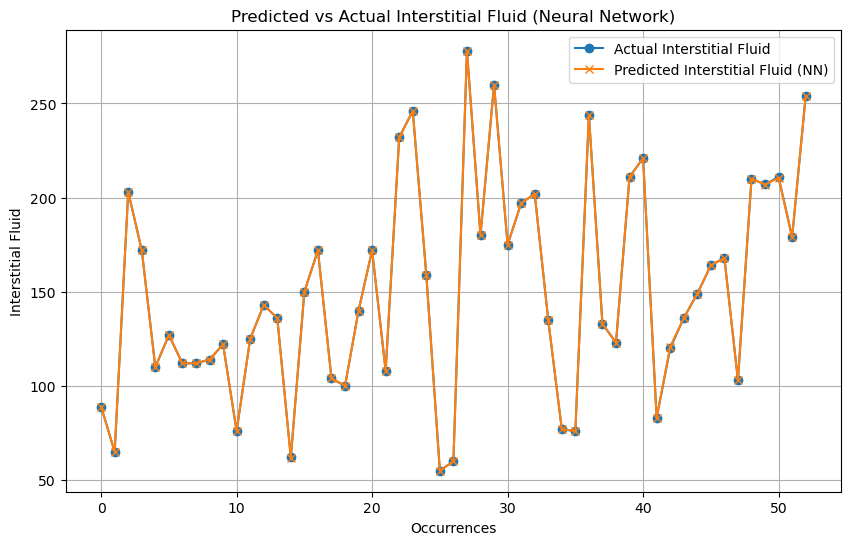

Next predicted interstitial fluid reading: 253.99643430631298


In [6]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Moni.xlsx'
df = pd.read_excel(file_path)

# Prepare the data (include all variables)
X = df[["Acetone ketones ppm", "Blood Pressure Top", "Blood Pressure Bottom", "Pulse", "Heart Rate", "Temperature", "Pulse Oxygen"]]
y = df["Interstital Fluid"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the neural network model with regularization
nn_model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=5000, alpha=0.001, random_state=42)
nn_model.fit(X_scaled, y)

# Predict the interstitial fluid using the neural network model
df['Predicted Interstitial Fluid (NN)'] = nn_model.predict(X_scaled)

# Predict the next interstitial fluid reading based on the latest data point
next_data_point = scaler.transform([X.iloc[-1].values])
next_prediction = nn_model.predict(next_data_point)[0]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Interstital Fluid'], label='Actual Interstitial Fluid', marker='o')
plt.plot(df.index, df['Predicted Interstitial Fluid (NN)'], label='Predicted Interstitial Fluid (NN)', marker='x')
plt.xlabel('Occurrences')
plt.ylabel('Interstitial Fluid')
plt.title('Predicted vs Actual Interstitial Fluid (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

# Print the next predicted interstitial fluid reading
print(f"Next predicted interstitial fluid reading: {next_prediction}")


In [8]:
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure TensorFlow uses the correct probability distribution module
tfd = tfp.distributions

# Load the dataset
file_path = 'Moni.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Prepare the data (using only "Acetone ketones ppm")
X = df[["Acetone ketones ppm"]].values.astype(np.float32)
y = df["Interstital Fluid"].values.astype(np.float32)

# Define the Bayesian Neural Network model using the Functional API
def build_bayesian_nn():
    inputs = tf.keras.Input(shape=(1,))
    x = tfp.layers.DenseFlipout(50, activation="relu")(inputs)
    x = tfp.layers.DenseFlipout(25, activation="relu")(x)
    outputs = tfp.layers.DenseFlipout(1)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    neg_log_likelihood = lambda y, rv_y: -rv_y.log_prob(y)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss=neg_log_likelihood)
    return model

# Build the model
model = build_bayesian_nn()

# Train the model
history = model.fit(X, y, epochs=1000, verbose=0)

# Predict interstitial fluid using the Bayesian neural network
y_pred = model(X).numpy().flatten()

# Create a plot comparing the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Actual Interstitial Fluid', marker='o')
plt.plot(df.index, y_pred, label='Predicted Interstitial Fluid (Bayesian NN)', marker='x')
plt.xlabel('Occurrences')
plt.ylabel('Interstitial Fluid')
plt.title('Predicted vs Actual Interstitial Fluid (Bayesian Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next interstitial fluid reading based on the latest acetone value
next_prediction = model(np.array([X[-1]])).numpy().flatten()[0]
print(f"Next predicted interstitial fluid reading: {next_prediction}")


ValueError: Arg specs do not match: original=FullArgSpec(args=['input', 'dtype', 'name', 'layout'], varargs=None, varkw=None, defaults=(None, None, None), kwonlyargs=[], kwonlydefaults=None, annotations={}), new=FullArgSpec(args=['input', 'dtype', 'name'], varargs=None, varkw=None, defaults=(None, None), kwonlyargs=[], kwonlydefaults=None, annotations={}), fn=<function ones_like_v2 at 0x35b8a1440>